In [39]:
import numpy as np
import matplotlib.pyplot as plt
# import skimage as ski

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale
from src.operators.radonski import Radonski

# from src.utils.dataloader import ct_test_dataloader#, unstandardization




angles = np.linspace(0.0,180.0,num=100)
radon = Radonski(angles)  # Radon class

0.0


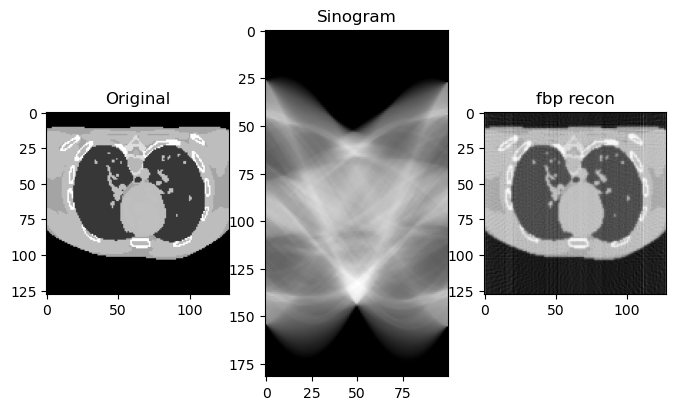

In [ ]:
'''
x = np.load('./data/test_slices/50.npy')
# x = shepp_logan_phantom()
y = radon.transform(x)
x_rec = radon.fbp(y)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(x, cmap=plt.cm.Greys_r)

ax2.set_title("Sinogram")
ax2.imshow(y, cmap=plt.cm.Greys_r,aspect='auto')

ax3.set_title("fbp recon")
ax3.imshow(x_rec, cmap=plt.cm.Greys_r)

print(np.min(x))
'''